# 20MIA1031
# SANJAY.M

## Using Electronic Health Records to predict future diagnosis codes with Gated Recurrent Units

Electronic medical records( EMRs), which is sometimes interchangeably called Electronic health records(EHRs) are primarily used to electronically-store patient health data digitally. 

In [ ]:
import pandas as pd
import numpy as np

admission_table = {'Patient 1': {'PatientID':'A1234-B456', 
                          'Admission ID':[12,34,15], 
                          'AdmissionStartDate':['2019-01-03 9:34:55','2019-02-03 10:50:55','2019-04-03 12:34:55'],
                          'AdmissionEndDate':['2019-01-07 8:45:43','2019-03-04 1:50:32','2019-04-03 5:38:18']},
                   'Patient 2': {'PatientID':'B1234-C456', 
                          'Admission ID':[13,34], 
                          'AdmissionStartDate':['2018-01-03 9:34:55','2018-02-03 10:50:55'],
                          'AdmissionEndDate':['2018-01-07 8:45:43','2018-03-04 1:50:32']}}
admission_table = (pd.concat({k: pd.DataFrame(v) for k, v in admission_table.items()}).reset_index(level=1, drop=True))
admission_table = admission_table.reset_index(drop=True)

In [ ]:
Patient_1 = {'PatientID':'A1234-B456', 
             'Admission ID':[12,34,15], 
             'PrimaryDiagnosisCode':[['E11.64','I25.812','I25.10'],
                                     ['E11.64','I25.812','I25.10','780.96','784.0'],
                                     ['E11.64','I25.812','I25.10','786.50','401.9','789.00']],
             'CodingSystem':['ICD-9','ICD-9','ICD-9'],
             'DiagnosisCodeDescription':[['Type 2 diabetes mellitus with hypoglycemia',
                                          'Atherosclerosis of bypass graft of coronary artery of transplanted heart without angina pectoris',
                                          'Atherosclerotic heart disease of native coronary artery without angina pectoris'],
                                         ['Type 2 diabetes mellitus with hypoglycemia',
                                          'Atherosclerosis of bypass graft of coronary artery of transplanted heart without angina pectoris',
                                          'Atherosclerotic heart disease of native coronary artery without angina pectoris',
                                          'Generalized Pain', 'Dizziness and giddiness'],
                                         ['Type 2 diabetes mellitus with hypoglycemia',
                                          'Atherosclerosis of bypass graft of coronary artery of transplanted heart without angina pectoris',
                                          'Atherosclerotic heart disease of native coronary artery without angina pectoris',
                                          'Chest pain, unspecified','Essential hypertension, unspecified',
                                          'Abdominal pain, unspecified site']]}
Patient_2 = {'PatientID':'B1234-C456', 
              'Admission ID':[13,34], 
              'PrimaryDiagnosisCode':[['M05.59','Z13.85','O99.35'],['M05.59','Z13.85','O99.35','D37.0']],
              'CodingSystem':['ICD-9','ICD-9'],
              'DiagnosisCodeDescription':[['Rheumatoid polyneuropathy with rheumatoid arthritis of multiple sites',
                                           'Encounter for screening for nervous system disorders',
                                           'Diseases of the nervous system complicating pregnancy, childbirth, and the puerperium'],
                                          ['Rheumatoid polyneuropathy with rheumatoid arthritis of multiple sites',
                                           'Encounter for screening for nervous system disorders',
                                           'Diseases of the nervous system complicating pregnancy, childbirth, and the puerperium',
                                           'Neoplasm of uncertain behavior of lip, oral cavity and pharynx']]}

In [ ]:
def process_ehr(Patient1,Patient2):
    pt_diagnosis_table = [Patient1,Patient2]
    pt_diagnosis_table = pd.concat([pd.DataFrame({k:v for k,v in d.items()}) for d in pt_diagnosis_table])
    
    pt_diagnosis_table = (pt_diagnosis_table.set_index(['PatientID', 'Admission ID','CodingSystem'])
              .apply(lambda x: x.apply(pd.Series).stack())
              .reset_index()
              .drop('level_3', 1))
    return pt_diagnosis_table
def hash_key(df):
    df['HashKey'] = df['PatientID'].\
    apply(lambda x: x.split('-')[0]) + '-' + df['Admission ID'].astype('str')
    cols = [df.columns[-1]] + [col for col in df if col != df.columns[-1]]
    print(cols)
    return df[cols]
diagnosis_table = process_ehr(Patient_1,Patient_2)
diagnosis_table.head()

<ipython-input-3-3e4623b65dac>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  pt_diagnosis_table = (pt_diagnosis_table.set_index(['PatientID', 'Admission ID','CodingSystem'])


,PatientID,Admission ID,CodingSystem,PrimaryDiagnosisCode,DiagnosisCodeDescription
0,A1234-B456,12,ICD-9,E11.64,Type 2 diabetes mellitus with hypoglycemia
1,A1234-B456,12,ICD-9,I25.812,Atherosclerosis of bypass graft of coronary ar...
2,A1234-B456,12,ICD-9,I25.10,Atherosclerotic heart disease of native corona...
3,A1234-B456,34,ICD-9,E11.64,Type 2 diabetes mellitus with hypoglycemia
4,A1234-B456,34,ICD-9,I25.812,Atherosclerosis of bypass graft of coronary ar...


In [ ]:
diagnosis_table[diagnosis_table['Admission ID']==34]


,PatientID,Admission ID,CodingSystem,PrimaryDiagnosisCode,DiagnosisCodeDescription
3,A1234-B456,34,ICD-9,E11.64,Type 2 diabetes mellitus with hypoglycemia
4,A1234-B456,34,ICD-9,I25.812,Atherosclerosis of bypass graft of coronary ar...
5,A1234-B456,34,ICD-9,I25.10,Atherosclerotic heart disease of native corona...
6,A1234-B456,34,ICD-9,780.96,Generalized Pain
7,A1234-B456,34,ICD-9,784.0,Dizziness and giddiness
17,B1234-C456,34,ICD-9,M05.59,Rheumatoid polyneuropathy with rheumatoid arth...
18,B1234-C456,34,ICD-9,Z13.85,Encounter for screening for nervous system dis...
19,B1234-C456,34,ICD-9,O99.35,Diseases of the nervous system complicating pr...
20,B1234-C456,34,ICD-9,D37.0,"Neoplasm of uncertain behavior of lip, oral ca..."


In [ ]:
admission_table.head()


,PatientID,Admission ID,AdmissionStartDate,AdmissionEndDate
0,A1234-B456,12,2019-01-03 9:34:55,2019-01-07 8:45:43
1,A1234-B456,34,2019-02-03 10:50:55,2019-03-04 1:50:32
2,A1234-B456,15,2019-04-03 12:34:55,2019-04-03 5:38:18
3,B1234-C456,13,2018-01-03 9:34:55,2018-01-07 8:45:43
4,B1234-C456,34,2018-02-03 10:50:55,2018-03-04 1:50:32


In [ ]:
admission_table[['AdmissionStartDate','AdmissionEndDate']] = admission_table[['AdmissionStartDate','AdmissionEndDate']]\
                .apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d'))
admission_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   PatientID           5 non-null      object        
 1   Admission ID        5 non-null      int64         
 2   AdmissionStartDate  5 non-null      datetime64[ns]
 3   AdmissionEndDate    5 non-null      datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 288.0+ bytes


In [ ]:
diagnosis_table.head()


,PatientID,Admission ID,CodingSystem,PrimaryDiagnosisCode,DiagnosisCodeDescription
0,A1234-B456,12,ICD-9,E11.64,Type 2 diabetes mellitus with hypoglycemia
1,A1234-B456,12,ICD-9,I25.812,Atherosclerosis of bypass graft of coronary ar...
2,A1234-B456,12,ICD-9,I25.10,Atherosclerotic heart disease of native corona...
3,A1234-B456,34,ICD-9,E11.64,Type 2 diabetes mellitus with hypoglycemia
4,A1234-B456,34,ICD-9,I25.812,Atherosclerosis of bypass graft of coronary ar...


In [ ]:
diagnosis_table.to_csv('/content/Diagnosis_Table.csv',encoding='UTF-8',index=False)
admission_table.to_csv('/content/Admissions_Table.csv',encoding='UTF-8',index=False,date_format='%Y-%m-%d')


In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import warnings
from datetime import datetime
import torch
import pickle
from collections import defaultdict
warnings.filterwarnings('ignore')
sns.set(style='white')
%autosave 180




Autosaving every 180 seconds


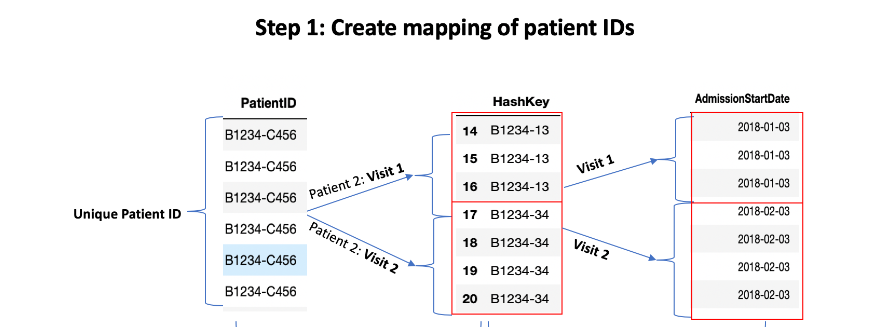

In [ ]:

print('Creating visit date mapping')
patHashMap = dict(defaultdict(list))  # this creates a dictionary with a list of values for each patient:[number of visists]
visitMap = dict(defaultdict()) # this creates a dictionary with a mapping of the patientID : visitdates

data = open('/content/Admissions_Table.csv','r')
data.readline()[1:] # read every line except the file header

for line in data:
    feature = line.strip().split(',') # split line on , and isolate columns
    visitDateID = datetime.strptime(feature[3],'%Y-%m-%d') 
    patHashMap.setdefault(feature[1], []).append(feature[0]) # create a mapping for each visit for a specific PatientID
    visitMap.setdefault(feature[0], []).append(visitDateID) # create a mapping for each visit for a specific Admission Date
    
#Patient ID- visit mapping
patHashMap

Creating visit date mapping


{'12': ['A1234-B456'],
 '34': ['A1234-B456', 'B1234-C456'],
 '15': ['A1234-B456'],
 '13': ['B1234-C456']}

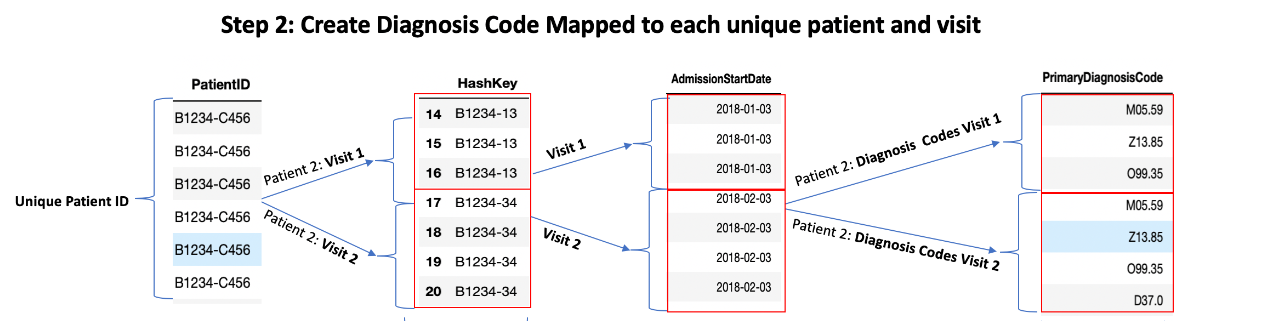

In [ ]:
# Patient Admission ID- visit date mapping
visitMap

{'A1234-B456': [datetime.datetime(2019, 1, 7, 0, 0),
  datetime.datetime(2019, 3, 4, 0, 0),
  datetime.datetime(2019, 4, 3, 0, 0)],
 'B1234-C456': [datetime.datetime(2018, 1, 7, 0, 0),
  datetime.datetime(2018, 3, 4, 0, 0)]}

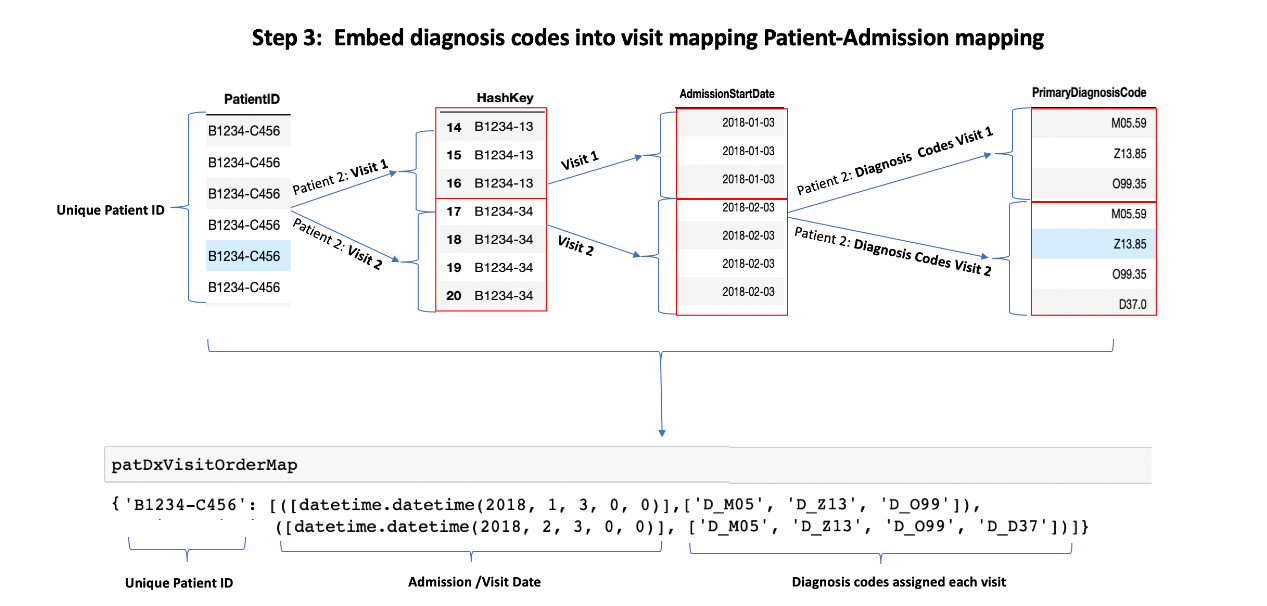

In [ ]:
print('Creating Diagnosis-Visit mapping')
visitDxMap = dict(defaultdict(list))

data = open('/content/Diagnosis_Table.csv', 'r')
data.readline()[1:]

for line in data:
    feature = line.strip().split(',')
    visitDxMap.setdefault(feature[0], []).append('D_' + feature[4].split('.')[0]) # add a unique identifier before the
    
visitDxMap # Mapping of each Admission ID to each diagnosis code assigned during that visit



Creating Diagnosis-Visit mapping


{'A1234-B456': ['D_Type 2 diabetes mellitus with hypoglycemia',
  'D_Atherosclerosis of bypass graft of coronary artery of transplanted heart without angina pectoris',
  'D_Atherosclerotic heart disease of native coronary artery without angina pectoris',
  'D_Type 2 diabetes mellitus with hypoglycemia',
  'D_Atherosclerosis of bypass graft of coronary artery of transplanted heart without angina pectoris',
  'D_Atherosclerotic heart disease of native coronary artery without angina pectoris',
  'D_Generalized Pain',
  'D_Dizziness and giddiness',
  'D_Type 2 diabetes mellitus with hypoglycemia',
  'D_Atherosclerosis of bypass graft of coronary artery of transplanted heart without angina pectoris',
  'D_Atherosclerotic heart disease of native coronary artery without angina pectoris',
  'D_"Chest pain',
  'D_"Essential hypertension',
  'D_"Abdominal pain'],
 'B1234-C456': ['D_Rheumatoid polyneuropathy with rheumatoid arthritis of multiple sites',
  'D_Encounter for screening for nervous sy

In [ ]:
print("Sorting visit mapping")
patDxVisitOrderMap = {}
for patid, visitDates in patHashMap.items():
    sorted_list = ([(visitMap[visitDateID], visitDxMap[visitDateID]) for visitDateID in visitDates])
    patDxVisitOrderMap[patid] = sorted_list 
  
patDxVisitOrderMap



Sorting visit mapping


{'12': [([datetime.datetime(2019, 1, 7, 0, 0),
    datetime.datetime(2019, 3, 4, 0, 0),
    datetime.datetime(2019, 4, 3, 0, 0)],
   ['D_Type 2 diabetes mellitus with hypoglycemia',
    'D_Atherosclerosis of bypass graft of coronary artery of transplanted heart without angina pectoris',
    'D_Atherosclerotic heart disease of native coronary artery without angina pectoris',
    'D_Type 2 diabetes mellitus with hypoglycemia',
    'D_Atherosclerosis of bypass graft of coronary artery of transplanted heart without angina pectoris',
    'D_Atherosclerotic heart disease of native coronary artery without angina pectoris',
    'D_Generalized Pain',
    'D_Dizziness and giddiness',
    'D_Type 2 diabetes mellitus with hypoglycemia',
    'D_Atherosclerosis of bypass graft of coronary artery of transplanted heart without angina pectoris',
    'D_Atherosclerotic heart disease of native coronary artery without angina pectoris',
    'D_"Chest pain',
    'D_"Essential hypertension',
    'D_"Abdomina

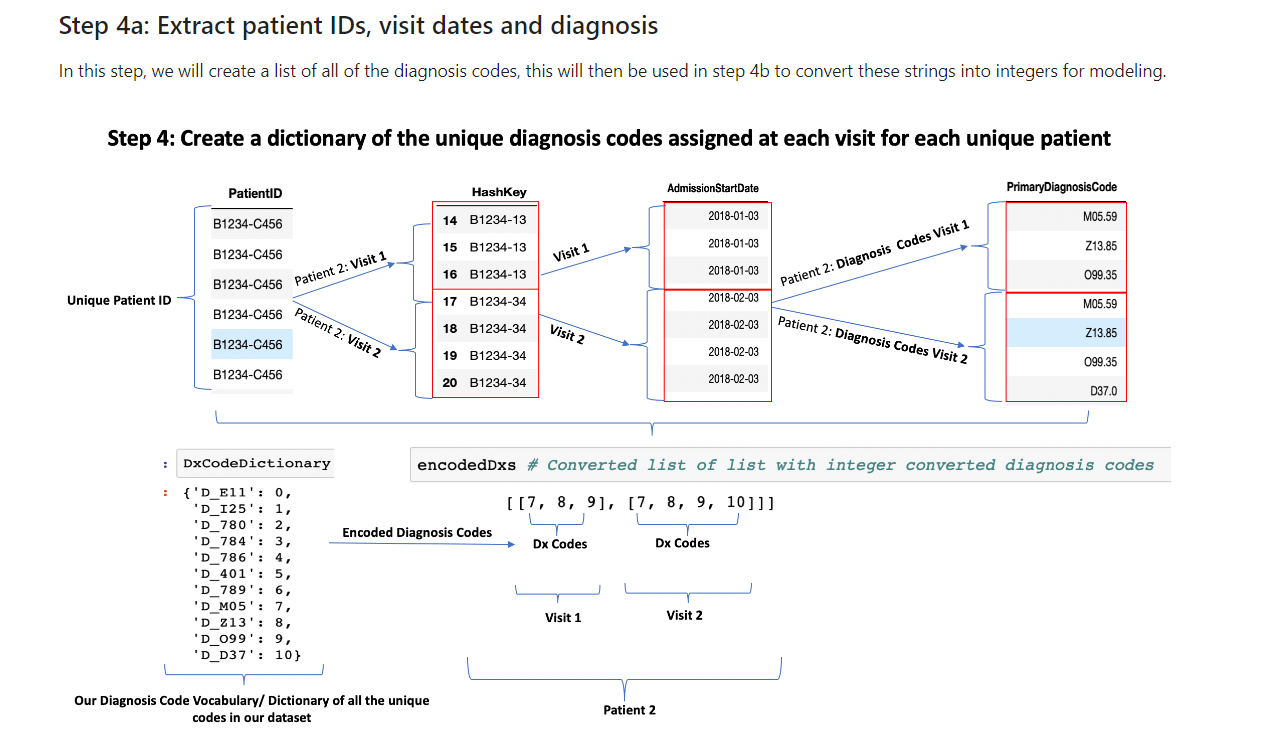

In [ ]:
print("Extracting patient IDs, visit dates and diagnosis codes into individual lists for encoding")
patIDs = [patid for patid, visitDate in patDxVisitOrderMap.items()]
datesList = [[visit[0][0] for visit in visitDate] for patid, visitDate in patDxVisitOrderMap.items()]
DxsCodesList = [[visit[1] for visit in visitDate] for patid, visitDate in patDxVisitOrderMap.items()]

patIDs


Extracting patient IDs, visit dates and diagnosis codes into individual lists for encoding


['12', '34', '15', '13']

In [ ]:
datesList

[[datetime.datetime(2019, 1, 7, 0, 0)],
 [datetime.datetime(2019, 1, 7, 0, 0), datetime.datetime(2018, 1, 7, 0, 0)],
 [datetime.datetime(2019, 1, 7, 0, 0)],
 [datetime.datetime(2018, 1, 7, 0, 0)]]

In [ ]:

DxsCodesList

[[['D_Type 2 diabetes mellitus with hypoglycemia',
   'D_Atherosclerosis of bypass graft of coronary artery of transplanted heart without angina pectoris',
   'D_Atherosclerotic heart disease of native coronary artery without angina pectoris',
   'D_Type 2 diabetes mellitus with hypoglycemia',
   'D_Atherosclerosis of bypass graft of coronary artery of transplanted heart without angina pectoris',
   'D_Atherosclerotic heart disease of native coronary artery without angina pectoris',
   'D_Generalized Pain',
   'D_Dizziness and giddiness',
   'D_Type 2 diabetes mellitus with hypoglycemia',
   'D_Atherosclerosis of bypass graft of coronary artery of transplanted heart without angina pectoris',
   'D_Atherosclerotic heart disease of native coronary artery without angina pectoris',
   'D_"Chest pain',
   'D_"Essential hypertension',
   'D_"Abdominal pain']],
 [['D_Type 2 diabetes mellitus with hypoglycemia',
   'D_Atherosclerosis of bypass graft of coronary artery of transplanted heart wit

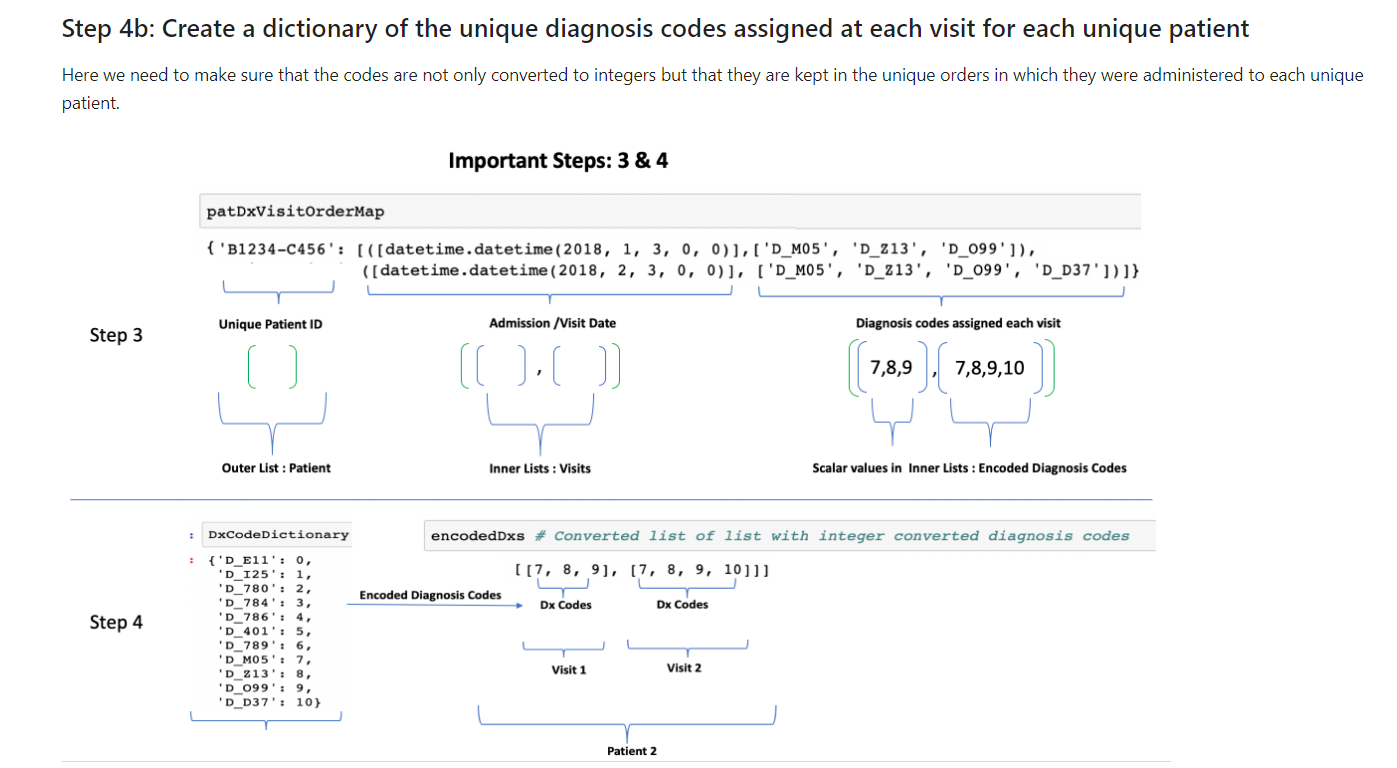

In [ ]:
# ('Encoding string Dx codes to integers and mapping the encoded integer value to the ICD-10 code for interpretation')
DxCodeDictionary = {}
encodedDxs = []
for patient in DxsCodesList:
    encodedPatientDxs = []
    for visit in patient:
        encodedVisit = []
        for code in visit:
            if code in DxCodeDictionary:
                encodedVisit.append(DxCodeDictionary[code])
            else:
                DxCodeDictionary[code] = len(DxCodeDictionary)
                encodedVisit.append(DxCodeDictionary[code])
        encodedPatientDxs.append(encodedVisit)
    encodedDxs.append(encodedPatientDxs)
    
DxCodeDictionary # Dictionary of all unique codes in the entire dataset aka: Our Code Vocabulary




{'D_Type 2 diabetes mellitus with hypoglycemia': 0,
 'D_Atherosclerosis of bypass graft of coronary artery of transplanted heart without angina pectoris': 1,
 'D_Atherosclerotic heart disease of native coronary artery without angina pectoris': 2,
 'D_Generalized Pain': 3,
 'D_Dizziness and giddiness': 4,
 'D_"Chest pain': 5,
 'D_"Essential hypertension': 6,
 'D_"Abdominal pain': 7,
 'D_Rheumatoid polyneuropathy with rheumatoid arthritis of multiple sites': 8,
 'D_Encounter for screening for nervous system disorders': 9,
 'D_"Diseases of the nervous system complicating pregnancy': 10,
 'D_"Neoplasm of uncertain behavior of lip': 11}

In [ ]:


encodedDxs # Converted list of list with integer converted diagnosis codes



[[[0, 1, 2, 0, 1, 2, 3, 4, 0, 1, 2, 5, 6, 7]],
 [[0, 1, 2, 0, 1, 2, 3, 4, 0, 1, 2, 5, 6, 7], [8, 9, 10, 8, 9, 10, 11]],
 [[0, 1, 2, 0, 1, 2, 3, 4, 0, 1, 2, 5, 6, 7]],
 [[8, 9, 10, 8, 9, 10, 11]]]

In [ ]:
# Step 6: Dump the data into a pickled list of list

outFile = 'ArtificialEHR_Data'
print('Dumping files into a pickled list')
pickle.dump(patIDs, open(outFile+'.patIDs', 'wb'),-1)
pickle.dump(datesList, open(outFile+'.dates', 'wb'),-1)
pickle.dump(encodedDxs, open(outFile+'.encodedDxs', 'wb'),-1)
pickle.dump(DxCodeDictionary, open(outFile+'.Dxdictionary', 'wb'),-1)

Dumping files into a pickled list


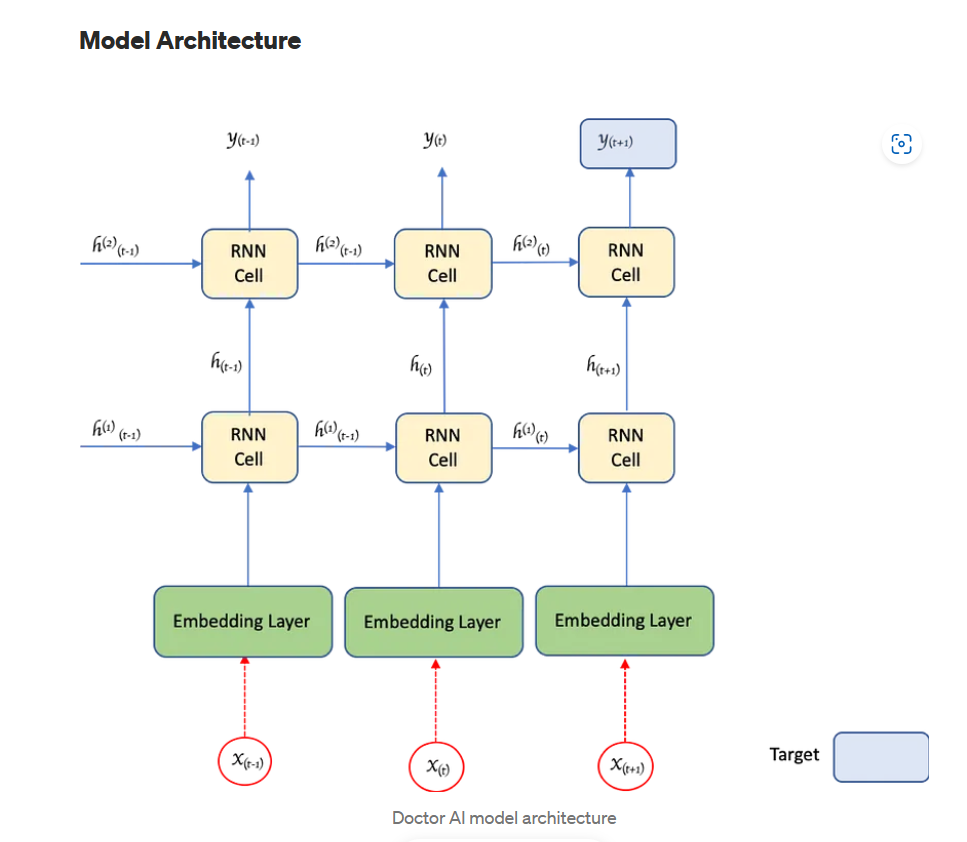

In [56]:
print('Creating visit date mapping')
patHashMap = dict(defaultdict(list))  # this creates a dictionary with a list of values for each patient:[number of visists]
visitMap = dict(defaultdict()) # this creates a dictionary with a mapping of the patientID : visitdates

data = open('/content/Admissions_Table.csv','r')
data.readline()[1:] # read every line except the file header

for line in data:
    feature = line.strip().split(',')
    visitDateID = datetime.strptime(feature[12],'%Y-%m-%d')
    patHashMap.setdefault(feature[0], []).append(feature[1])
    visitMap.setdefault(feature[1], []).append(visitDateID)

print('Creating Diagnosis-Visit mapping')
visitDxMap = dict(defaultdict(list))

data = open('data/Diagnosis_Table.csv', 'r')
data.readline()[1:]

for line in data:
    feature = line.strip().split(',')
    visitDxMap.setdefault(feature[1], []).append('D_' + feature[7].split('.')[0])

print("Sorting visit mapping")
patDxVisitOrderMap = {}
for patid, visitDates in patHashMap.items():
    sorted_list = ([(visitMap[visitDateID], visitDxMap[visitDateID]) for visitDateID in visitDates])
    patDxVisitOrderMap[patid] = sorted_list 

print("Extracting patient IDs, visit dates and diagnosis codes into individual lists for encoding")
patIDs = [patid for patid, visitDate in patDxVisitOrderMap.items()]
datesList = [[visit[0][0] for visit in visitDate] for patid, visitDate in patDxVisitOrderMap.items()]
DxsCodesList = [[visit[1] for visit in visitDate] for patid, visitDate in patDxVisitOrderMap.items()]

print('Encoding string Dx codes to integers and mapping the encoded integer value to the ICD-10 code for interpretation')
DxCodeDictionary = {}
encodedDxs = []
for patient in DxsCodesList:
    encodedPatientDxs = []
    for visit in patient:
        encodedVisit = []
        for code in visit:
            if code in DxCodeDictionary:
                encodedVisit.append(DxCodeDictionary[code])
            else:
                DxCodeDictionary[code] = len(DxCodeDictionary)
                encodedVisit.append(DxCodeDictionary[code])
        encodedPatientDxs.append(encodedVisit)
    encodedDxs.append(encodedPatientDxs)

Creating visit date mapping


IndexError: ignored